## Bacchanal Buffet at Caesars Palace Hakkındaki Excel Datalarının İşlenmesi

In [333]:
#!pip install wordcloud
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",100)
df=pd.read_csv("restaurant.csv")
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [334]:
df.shape

(10417, 10)

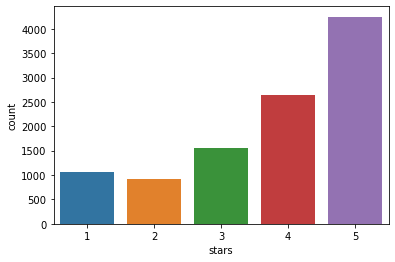

In [335]:
sns.countplot(x=df["stars"]);

In [336]:
df["text"]=df["text"].str.lower() #küçük harfe çevirdik
df['text']=df['text'].str.replace('[^\w\s]','') #noktalama işaretlerini kaldırdık
df['text']=df['text'].str.replace('\d+','') #rakamları kaldırdık
df['text']=df['text'].str.replace('\n','').replace('\r','') #boşlukları kaldırdık

In [337]:
x=df.text
y=df.stars

In [338]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [339]:
vect=CountVectorizer(lowercase=True,stop_words="english") 
x_yeni=vect.fit_transform(x)

In [340]:
vect=CountVectorizer(lowercase=True) 
x_yeni=vect.fit_transform(x)

In [341]:
x_train,x_test,y_train,y_test=train_test_split(x_yeni,y,random_state=42)

In [342]:
x[0]

'after getting food poisoning at the palms hotel i was scared to eat at any more buffets but we figured with the high price tag the positive reviews etc it was worth a chance im really glad we gave it a try btw i uploaded a collage of the things we atethe seafood line is by the far the longest i would not recommend showing up in heels if youre female my feet were killing me between the line at the door the line to get sat and the seafood line totally worth it thoughthe prime rib was the best ive ever hadi loved the sweet potato totsi even have phothe music was great and so was our server alma  he was a older gentleman with a mustache and was very attentive and delightfuli will return next trip in more comfortable shoes after a horrible visit at the palms with non stop issues in a matter of  hours your establishment was truly the high light of our trip thank you for an exquisite dinner'

In [343]:
from sklearn.naive_bayes import MultinomialNB

In [344]:
mb=MultinomialNB()

In [345]:
mb.fit(x_train,y_train)

MultinomialNB()

In [346]:
tahmin=mb.predict(x_test)

In [347]:
tahmin

array([5, 4, 1, ..., 4, 5, 5], dtype=int64)

In [348]:
from sklearn.metrics import accuracy_score

In [349]:
accuracy_score(y_test,tahmin)

0.5731285988483685

In [350]:
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np

In [351]:
df.loc[df['stars']==3,"sentiment"]="nötr"
df.loc[df['stars']<3,"sentiment"]="negatif"
df.loc[df['stars']>3,"sentiment"]="pozitif"

In [352]:
import seaborn as sns

<AxesSubplot:xlabel='sentiment', ylabel='count'>

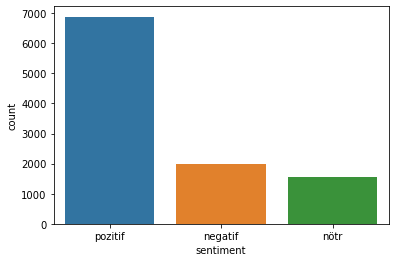

In [353]:
sns.countplot(df["sentiment"])

In [356]:
datas=df["sentiment"]

In [80]:
x,y=df['text'],df['sentiment']

In [81]:
def tokenize_test(vect,x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier #yüklemek için !pip install xgboost kullandım
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=60)
    
    print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
    
    g=GaussianNB()
    b=BernoulliNB()
    SVC=SVC()
    KN=KNeighborsClassifier()
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGBC=XGBClassifier()
    
     
    algos=[g,b,SVC]
    algo_names=['GaussianNB','BernoulliNB','SVC']
    
    
    accuracy_scored=[]    
        
    x_train_dtm=vect.fit_transform(x_train).toarray()
    x_test_dtm=vect.transform(x_test).toarray()
    
    for item in algos:
        item.fit(x_train_dtm,y_train)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test_dtm)))
    result=pd.DataFrame(accuracy_scored,columns=['accuracy_score'],index=algo_names)
    result.accuracy_score=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)  

In [82]:
vect=CountVectorizer()
tokenize_test(vect,x,y)

(8333,) (2084,) (8333,) (2084,)


,accuracy_score
SVC,0.770154
BernoulliNB,0.684261
GaussianNB,0.430422


In [83]:
def wc(data,bgcolor):
    from PIL import Image
    mask = np.array(Image.open("cloud.png"))
    wc=WordCloud(background_color=bgcolor, width=800, height=400,mask=mask,max_words=100).generate(' '.join(data))
    plt.figure( figsize=(20,10) )
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

In [84]:
negatif_data=df[df['sentiment']=="negatif"]['text']
pozitif_data=df[df['sentiment']=="pozitif"]['text']
notr_data=df[df['sentiment']=="nötr"]['text']

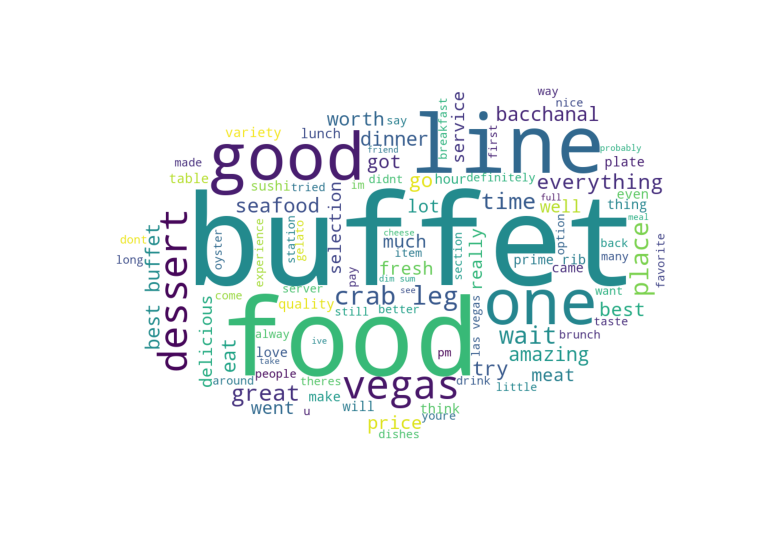

In [87]:
wc(pozitif_data,'white') # OLUMLU DÜŞÜNCELER

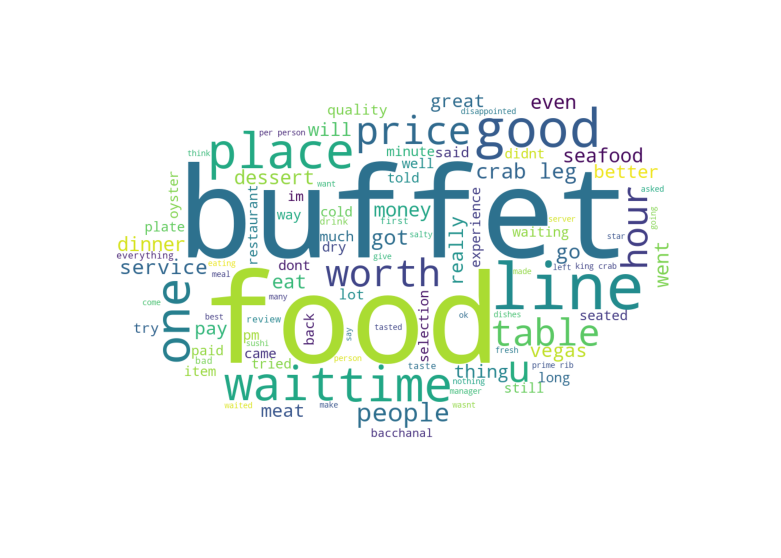

In [88]:
wc(negatif_data,'white') #OLUMSUZ DÜŞÜNCELER

# Twitter Üzerinden Becchanal Buffet Hakkında Yazılanların Çekilmesi

In [89]:
#pip install twython

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [276]:
from twython import Twython

In [277]:
CONSUMER_KEY = 'Z7--------oJXsT4'
CONSUMER_SECRET = 'xkub3nQrTmfxjihxSQY2wtnuOi-------1GPl'

twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET)

In [292]:
for i in range(0,1000,100):
    results=twitter.search(q="Bacchanal",count=i)
     

In [293]:
results

{'statuses': [{'created_at': 'Sat Nov 19 14:25:33 +0000 2022',
   'id': 1593973757634387975,
   'id_str': '1593973757634387975',
   'text': 'piera @PorterSqBoston has made me fanart. screaming crying throwing up running around throwing a bacchanal with my… https://t.co/WoUM4gEkrp',
   'truncated': True,
   'entities': {'hashtags': [],
    'symbols': [],
    'user_mentions': [{'screen_name': 'PorterSqBoston',
      'name': 'Porter Square Books: Boston Edition 🍂 ❄️',
      'id': 1483508696911073283,
      'id_str': '1483508696911073283',
      'indices': [6, 21]}],
    'urls': [{'url': 'https://t.co/WoUM4gEkrp',
      'expanded_url': 'https://twitter.com/i/web/status/1593973757634387975',
      'display_url': 'twitter.com/i/web/status/1…',
      'indices': [116, 139]}]},
   'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
   'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
   'in_reply_to_status_id': None,
   'in_reply_to_status_id_str

In [294]:
all_items=results["statuses"]

In [295]:
import pandas as pd

In [296]:
df2=pd.DataFrame(all_items)

In [297]:
df2.head()

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,retweeted_status,possibly_sensitive,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status
0,Sat Nov 19 14:25:33 +0000 2022,1593973757634387975,1593973757634387975,piera @PorterSqBoston has made me fanart. scre...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,None,"{'id': 126062547, 'id_str': '126062547', 'name...",None,None,None,None,False,0,1,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,Sat Nov 19 13:50:05 +0000 2022,1593964835582140418,1593964835582140418,RT @TheManWithESPN: @TMKSESPN @TMKSonYES @Real...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 564663191, 'id_str': '564663191', 'name...",None,None,None,None,False,3,0,False,False,en,{'created_at': 'Sat Nov 19 12:54:04 +0000 2022...,NaN,NaN,NaN,NaN,NaN
2,Sat Nov 19 13:37:37 +0000 2022,1593961694623338497,1593961694623338497,RT @TheManWithESPN: @TMKSESPN @TMKSonYES @Real...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 898609165895127040, 'id_str': '89860916...",None,None,None,None,False,3,0,False,False,en,{'created_at': 'Sat Nov 19 12:54:04 +0000 2022...,NaN,NaN,NaN,NaN,NaN
3,Sat Nov 19 12:57:39 +0000 2022,1593951638556880896,1593951638556880896,RT @TheManWithESPN: @TMKSESPN @TMKSonYES @Real...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 1502486759392923649, 'id_str': '1502486...",None,None,None,None,False,3,0,False,False,en,{'created_at': 'Sat Nov 19 12:54:04 +0000 2022...,NaN,NaN,NaN,NaN,NaN
4,Sat Nov 19 12:54:04 +0000 2022,1593950735246426113,1593950735246426113,@TMKSESPN @TMKSonYES @RealMichaelKay @DonLagre...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,3.649357e+09,3649356916,TMKSESPN,"{'id': 1372636857436143626, 'id_str': '1372636...",None,None,None,None,False,3,12,False,False,en,NaN,False,NaN,NaN,NaN,NaN


In [298]:
df2.shape

(100, 30)

In [252]:
sub ='Bacchanal Buffet'
 
df2["Indexes"]= df2["text"].str.find(sub)

In [253]:
df2["Indexes"]>-1

0      True
1     False
2      True
3      True
4     False
5      True
6     False
7      True
8     False
9     False
10    False
11    False
12     True
Name: Indexes, dtype: bool

In [299]:
df2.shape

(100, 30)

In [300]:
users=pd.DataFrame(d["user"] for d in results["statuses"])

In [301]:
users.head()

,id,id_str,name,screen_name,location,description,url,entities,protected,followers_count,friends_count,listed_count,created_at,favourites_count,utc_offset,time_zone,geo_enabled,verified,statuses_count,lang,contributors_enabled,is_translator,is_translation_enabled,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_image_url,profile_image_url_https,profile_banner_url,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,withheld_in_countries
0,126062547,126062547,Porter Square Books,PorterSqBooks,"Cambridge, MA",Fiercely independent bookstore. Follow our kid...,https://t.co/MCn5r4c6Qb,{'url': {'urls': [{'url': 'https://t.co/MCn5r4...,False,22651,3065,702,Wed Mar 24 18:32:33 +0000 2010,31722,None,None,True,False,43416,None,False,False,False,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/2653344898...,https://pbs.twimg.com/profile_images/265334489...,https://pbs.twimg.com/profile_banners/12606254...,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False,None,None,None,none,[]
1,564663191,564663191,Company President Josh B.,Josh_Burgs,Biblioteca Technology School,Josh B: Co-Founder/President of @TheDnRCompany...,None,{'description': {'urls': []}},False,216,621,1,Fri Apr 27 14:39:16 +0000 2012,7045,None,None,False,False,5422,None,False,False,False,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/1579294053...,https://pbs.twimg.com/profile_images/157929405...,https://pbs.twimg.com/profile_banners/56466319...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,None,None,None,none,[]
2,898609165895127040,898609165895127040,DiPietro & Rothenberg,DRonESPN,New York City,Hear us weekdays from 5-8AM on @ESPNNY98_7FM i...,https://t.co/jMOlxixiid,{'url': {'urls': [{'url': 'https://t.co/jMOlxi...,False,11853,140,32,Fri Aug 18 18:14:55 +0000 2017,6462,None,None,False,False,7591,None,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1433850052...,https://pbs.twimg.com/profile_images/143385005...,https://pbs.twimg.com/profile_banners/89860916...,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False,None,None,None,none,[]
3,1502486759392923649,1502486759392923649,The Company,TheDnRCompany,D&R HeadQuarters,The Company -We Are Known As “The Mole People”...,None,{'description': {'urls': []}},False,801,221,0,Sat Mar 12 03:29:54 +0000 2022,13248,None,None,True,False,7352,None,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1591827512...,https://pbs.twimg.com/profile_images/159182751...,https://pbs.twimg.com/profile_banners/15024867...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,None,None,None,none,[]
4,1372636857436143626,1372636857436143626,TheManWithE.S.P.N,TheManWithESPN,"New York, NY",Lonnie In Harlem Founder/CEO Of @dronespn #The...,None,{'description': {'urls': []}},False,415,326,1,Thu Mar 18 19:53:38 +0000 2021,35385,None,None,True,False,23611,None,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1592957735...,https://pbs.twimg.com/profile_images/159295773...,https://pbs.twimg.com/profile_banners/13726368...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,None,None,None,none,[]


In [302]:
tdf=df2.merge(users,left_index=True,right_index=True)

In [303]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 73 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   created_at_x                        100 non-null    object 
 1   id_x                                100 non-null    int64  
 2   id_str_x                            100 non-null    object 
 3   text                                100 non-null    object 
 4   truncated                           100 non-null    bool   
 5   entities_x                          100 non-null    object 
 6   metadata                            100 non-null    object 
 7   source                              100 non-null    object 
 8   in_reply_to_status_id               15 non-null     float64
 9   in_reply_to_status_id_str           15 non-null     object 
 10  in_reply_to_user_id                 19 non-null     float64
 11  in_reply_to_user_id_str             19 non-nul

<AxesSubplot:>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127481 (\N{REGIONAL INDICATOR SYMBOL LETTER T}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127464 (\N{REGIONAL INDICATOR SYMBOL LETTER C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128251 (\N{RADIO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129411 (\N{TURKEY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:

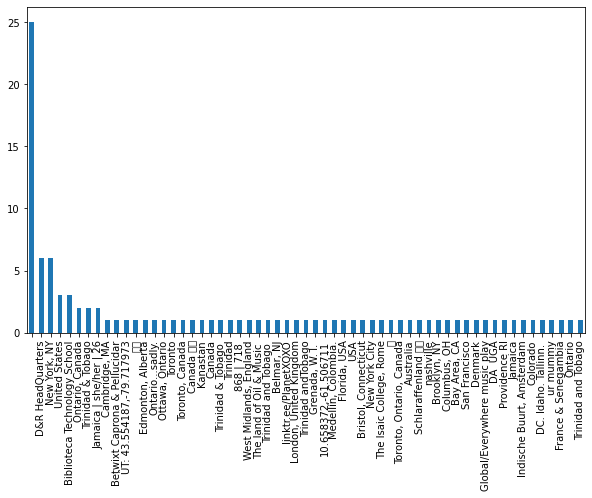

In [304]:
tdf.location.value_counts().plot(kind="bar",figsize=(10,6))

# Sentiment Analysis olumlu-olumsuz

In [305]:
from textblob import TextBlob

In [306]:
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [307]:
df2=tdf[["text"]]
df2.head()

,text
0,piera @PorterSqBoston has made me fanart. scre...
1,RT @TheManWithESPN: @TMKSESPN @TMKSonYES @Real...
2,RT @TheManWithESPN: @TMKSESPN @TMKSonYES @Real...
3,RT @TheManWithESPN: @TMKSESPN @TMKSonYES @Real...
4,@TMKSESPN @TMKSonYES @RealMichaelKay @DonLagre...


In [308]:
df2["sentiment"]=df2["text"].apply(detect_sentiment)

C:\Users\ibrah\AppData\Local\Temp\ipykernel_1384\1909004749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["sentiment"]=df2["text"].apply(detect_sentiment)


In [309]:
df2.tail()

,text,sentiment
95,RT @StephRamlogan: So Trinidad cah make a new ...,0.136364
96,RT @TheManWithESPN: @DRonESPN @HDumpty39 @Roth...,0.200000
97,RT @TheManWithESPN: @DRonESPN @HDumpty39 @Roth...,0.200000
98,@DRonESPN @HDumpty39 @RothenbergESPN @ESPNNY98...,0.200000
99,Shal Marshall x System32 - Bacchanal Wine (Mos...,0.500000


In [329]:
 df2.corr()

,sentiment,sent
sentiment,1.000000,0.821234
sent,0.821234,1.000000


In [310]:
df2.sentiment.value_counts()

 0.000000    52
 0.136364    14
 0.200000     7
 0.800000     5
 0.225000     3
 0.250000     2
 0.166667     2
 0.500000     2
 0.400000     1
 0.100000     1
 0.085227     1
 0.437500     1
-0.101389     1
-0.200000     1
 0.511429     1
 0.700000     1
 0.330000     1
-0.100000     1
 0.750000     1
 0.062500     1
 0.212500     1
Name: sentiment, dtype: int64

In [311]:
df2["text"]=df2["text"].str.lower()
df2["text"]=df2["text"].str.replace('[^\w\s]','')
df2["text"]=df2["text"].str.replace('\d+','')
df2["text"]=df2["text"].str.replace('\n','').replace('\r','')

C:\Users\ibrah\AppData\Local\Temp\ipykernel_1384\3859047943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["text"]=df2["text"].str.lower()
C:\Users\ibrah\AppData\Local\Temp\ipykernel_1384\3859047943.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df2["text"]=df2["text"].str.replace('[^\w\s]','')
C:\Users\ibrah\AppData\Local\Temp\ipykernel_1384\3859047943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["text"]=df2["text"].str.replace('[^\

In [312]:
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [313]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open("cloud.png"))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis("off")

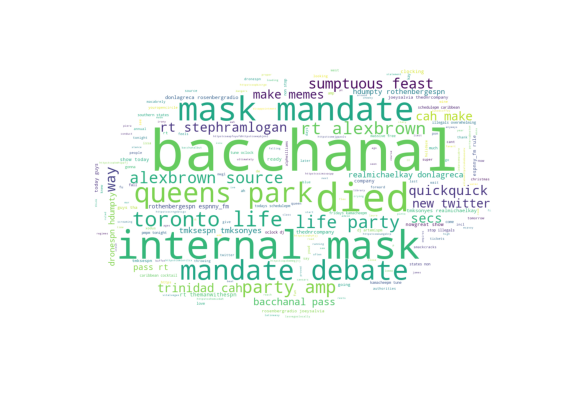

In [314]:
wc(df2.text,'white')

In [315]:
# 1 positive 2 negative 0 notr
def sentiment2(sent):
    if sent<-0.2:
        return 3
    elif sent>0.2:
        return 1
    else:
        return 0

In [316]:
 df2["sent"]=df2["sentiment"].apply(sentiment2)

C:\Users\ibrah\AppData\Local\Temp\ipykernel_1384\442396478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["sent"]=df2["sentiment"].apply(sentiment2)


In [317]:
df2.head()

,text,sentiment,sent
0,piera portersqboston has made me fanart scream...,-0.2,0
1,rt themanwithespn tmksespn tmksonyes realmicha...,0.0,0
2,rt themanwithespn tmksespn tmksonyes realmicha...,0.0,0
3,rt themanwithespn tmksespn tmksonyes realmicha...,0.0,0
4,tmksespn tmksonyes realmichaelkay donlagreca r...,0.0,0


<AxesSubplot:xlabel='sent', ylabel='count'>

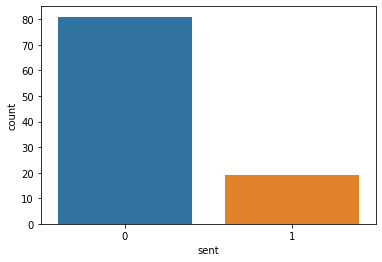

In [318]:
import seaborn as sns
sns.countplot(x=df2.sent)

In [319]:
x=df2["text"]
y=df2.sent

In [320]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [321]:
vect=CountVectorizer(stop_words="english")

In [322]:
x=vect.fit_transform(x)

In [323]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.15)

In [324]:
mb=MultinomialNB()

In [325]:
tahmin=mb.fit(x_train,y_train).predict(x_test)

In [326]:
accuracy_score(tahmin,y_test)

0.6666666666666666